# Proyek Analisis Data: Brazil E-Commerce Public Dataset
- **Nama:** Azrian Rifqi Radhitya
- **Email:** azrianrifqi115@gmail.com
- **ID Dicoding:** azrianrifq

## Menentukan Pertanyaan Bisnis

- Apa Kategori Produk yang Paling Laku dan Bagaimana Pola Penjualannya?
- Bagaimana Pola Pembayaran Pelanggan? (Metode yang Sering digunakan & Rata-rata Jumlah pembayaran)
- Seberapa Puas Pelanggan dengan Layanan Olist?
- Bagaimana Sebaran Pengguna Layanan Olist berdasarkan Letak Geografis?
- Apakah terdapat relasi antara skor review yang rendah dengan keterlambatan pengiriman pada pesanan?

## Import Semua Packages/Library yang Digunakan

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

## 1. Data Wrangling

### 1.1 Gathering Data

In [58]:
# Data directory
data_directory = 'data/'

# Fetch dataset
customers_df = pd.read_csv(data_directory + 'customers_dataset.csv')
geo_df  = pd.read_csv(data_directory + 'geolocation_dataset.csv')
order_items_df = pd.read_csv(data_directory + 'order_items_dataset.csv')
order_payments_df = pd.read_csv(data_directory + 'order_payments_dataset.csv')
order_reviews_df = pd.read_csv(data_directory + 'order_reviews_dataset.csv')
orders_df = pd.read_csv(data_directory + 'orders_dataset.csv')
product_category_df = pd.read_csv(data_directory + 'product_category_name_translation.csv')
products_df = pd.read_csv(data_directory + 'products_dataset.csv')
sellers_df = pd.read_csv(data_directory + 'sellers_dataset.csv')

In [59]:
# List of dataset variable names
datasetList = [
    'customers_df',
    'geo_df',
    'order_items_df',
    'order_payments_df',
    'order_reviews_df',
    'orders_df',
    'product_category_df',
    'products_df',
    'sellers_df'
]

for var in datasetList:
    df = globals()[var]
    print(var);display(df.head(5))
    print('\n')

customers_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




geo_df


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




order_items_df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




order_payments_df


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




order_reviews_df


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




orders_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




product_category_df


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




products_df


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




sellers_df


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 1.2 Assessing Data

#### Deskripsi dataset

In [60]:
for var in datasetList:
    df = globals()[var]
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

**Insights:**
- Kolom berupa tanggal memiliki tipe data berupa **object** sehingga perlu diubah menjadi **datettime**

#### Statistik Deskriptif tiap Dataset

In [61]:
for var in datasetList:
    df = globals()[var]
    print(f'Descriptive statistics for {var[:-3]} dataframe')
    display(df.describe(include='all').style.background_gradient(axis=0, cmap='Blues'));print()

Descriptive statistics for customers dataframe


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,nan,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,nan,sao paulo,SP
freq,1,17,nan,15540,41746
mean,nan,nan,35137.474583,nan,nan
std,nan,nan,29797.938996,nan,nan
min,nan,nan,1003.000000,nan,nan
25%,nan,nan,11347.000000,nan,nan
50%,nan,nan,24416.000000,nan,nan
75%,nan,nan,58900.000000,nan,nan



Descriptive statistics for geo dataframe


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1000163.000000,1000163.000000,1000163.000000,1000163,1000163
unique,nan,nan,nan,8011,27
top,nan,nan,nan,sao paulo,SP
freq,nan,nan,nan,135800,404268
mean,36574.166466,-21.176153,-46.390541,nan,nan
std,30549.335710,5.715866,4.269748,nan,nan
min,1001.000000,-36.605374,-101.466766,nan,nan
25%,11075.000000,-23.603546,-48.573172,nan,nan
50%,26530.000000,-22.919377,-46.637879,nan,nan
75%,63504.000000,-19.979620,-43.767709,nan,nan



Descriptive statistics for order_items dataframe


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,nan,32951,3095,93318,nan,nan
top,8272b63d03f5f79c56e9e4120aec44ef,nan,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,nan,nan
freq,21,nan,527,2033,21,nan,nan
mean,nan,1.197834,nan,nan,nan,120.653739,19.990320
std,nan,0.705124,nan,nan,nan,183.633928,15.806405
min,nan,1.000000,nan,nan,nan,0.850000,0.000000
25%,nan,1.000000,nan,nan,nan,39.900000,13.080000
50%,nan,1.000000,nan,nan,nan,74.990000,16.260000
75%,nan,1.000000,nan,nan,nan,134.900000,21.150000



Descriptive statistics for order_payments dataframe


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,nan,5,nan,nan
top,fa65dad1b0e818e3ccc5cb0e39231352,nan,credit_card,nan,nan
freq,29,nan,76795,nan,nan
mean,nan,1.092679,nan,2.853349,154.100380
std,nan,0.706584,nan,2.687051,217.494064
min,nan,1.000000,nan,0.000000,0.000000
25%,nan,1.000000,nan,1.000000,56.790000
50%,nan,1.000000,nan,1.000000,100.000000
75%,nan,1.000000,nan,4.000000,171.837500



Descriptive statistics for order_reviews dataframe


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,nan,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,nan,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,nan,423,230,463,4
mean,nan,nan,4.086421,nan,nan,nan,nan
std,nan,nan,1.347579,nan,nan,nan,nan
min,nan,nan,1.000000,nan,nan,nan,nan
25%,nan,nan,4.000000,nan,nan,nan,nan
50%,nan,nan,5.000000,nan,nan,nan,nan
75%,nan,nan,5.000000,nan,nan,nan,nan



Descriptive statistics for orders dataframe


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



Descriptive statistics for product_category dataframe


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



Descriptive statistics for products dataframe


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,nan,nan,nan,nan,nan,nan,nan
top,106392145fca363410d287a815be6de4,cama_mesa_banho,nan,nan,nan,nan,nan,nan,nan
freq,1,3029,nan,nan,nan,nan,nan,nan,nan
mean,nan,nan,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,nan,nan,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,nan,nan,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,nan,nan,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,nan,nan,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,nan,nan,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000



Descriptive statistics for sellers dataframe


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,nan,611,23
top,9e25199f6ef7e7c347120ff175652c3b,nan,sao paulo,SP
freq,1,nan,694,1849
mean,nan,32291.059451,nan,nan
std,nan,32713.453830,nan,nan
min,nan,1001.000000,nan,nan
25%,nan,7093.500000,nan,nan
50%,nan,14940.000000,nan,nan
75%,nan,64552.500000,nan,nan


#### Identifikasi Missing Value

In [62]:
for var in datasetList:
    df = globals()[var]  
    print(f'Missing values in {var}:')
    print(df.isna().sum(), '\n')

Missing values in customers_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Missing values in geo_df:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Missing values in order_items_df:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Missing values in order_payments_df:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Missing values in order_reviews_df:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message 

**Insight:**
1. Pada `df_order_reviews` terdapat review yang tidak memiliki komentar
    - kolom `review comment title` dan `review comment message` dapat kita isi dengan **"no comment"** untuk mewakili bahwa review yang diberikan tidak memiliki komen.

2. Pada `df_orders` kolom yang kosong kemungkinan besar menandakan bahwa order yang dilakukan belum sepenuhnya selesai atau mengalami kendala saat pemrosesan  
- **Solusi:**  
    * Kolom `order_approved_at` dapat kita isi dengan nilai dari `order_purchase_timestamp`, karena order yang sudah dibuat kemungkinan besar memiliki waktu pembelian.  
    * Kolom `order_delivered_carrier_date` dapat kita isi dengan nilai dari `order_estimated_delivery_date`, untuk memberikan perkiraan kapan pesanan mulai dikirim.  
    * Kolom `order_delivered_customer_date` dapat kita isi dengan nilai dari `order_estimated_delivery_date`, karena hal ini dapat membantu dalam analisis lebih lanjut terkait keterlambatan pengiriman.  


3. Pada `df_products` terdapat beberapa produk yang tidak memiliki deskripsi lengkap sehingga menimbulkan missing values pada kolom berikut:
- **Solusi:**
    * Kolom `category_name` dapat kita isi dengan **"unknown"**
    * Kolom `name_length` dapat kita isi dengan **median**
    * Kolom `description_length` dapat kita isi dengan **median**
    * Kolom `photos_qty` dapat kita isi dengan **median**

- Terdapat 2 baris produk yang tidak memiliki informasi berat dan dimensi.  
    * kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm` dapat kita:
        * Isi dengan **median** dari nilai yang tersedia.  
        * Jika produk dari kategori yang sama memiliki data lengkap, dapat digunakan **rata-rata** berdasarkan kategori.  

#### Identifikasi Duplikasi Data

In [63]:
for var in datasetList:
    df = globals()[var]
    print(f'Terdapat {df.duplicated().sum()} duplikasi pada dataset {var}')

Terdapat 0 duplikasi pada dataset customers_df
Terdapat 261831 duplikasi pada dataset geo_df
Terdapat 0 duplikasi pada dataset order_items_df
Terdapat 0 duplikasi pada dataset order_payments_df
Terdapat 0 duplikasi pada dataset order_reviews_df
Terdapat 0 duplikasi pada dataset orders_df
Terdapat 0 duplikasi pada dataset product_category_df
Terdapat 0 duplikasi pada dataset products_df
Terdapat 0 duplikasi pada dataset sellers_df


**Insight:**
- Dataset `df_geo` memiliki **261,831** duplikasi yang mungkin disebabkan oleh pengulangan data lokasi berdasarkan penggunaan.  
- **Solusi:** Menghapus duplikasi karena data geografis hanya digunakan untuk referensi lokasi dan tidak perlu menyimpan entri berulang.

### 1.3 Cleaning Data

#### Mengubah tipe data pada kolom berupa tanggal pada dataset orders dan order reviews

In [64]:
date_columns_orders = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                        'order_delivered_customer_date', 'order_estimated_delivery_date']

date_columns_reviews = ['review_creation_date', 'review_answer_timestamp']

# Change date columns data type to datetime
orders_df[date_columns_orders] = orders_df[date_columns_orders].apply(pd.to_datetime)
order_reviews_df[date_columns_reviews] = order_reviews_df[date_columns_reviews].apply(pd.to_datetime)
orders_df.info()
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype    

#### Menangani missing values

In [65]:
# Fill missing values in order_reviews_df
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('no comment')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('no comment')

# Fill missing values in orders_df
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

# Fill missing values in products_df
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

# Fill missing values for product dimensions and weight
dimensions = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dimensions:
    products_df[col] = products_df[col].fillna(products_df.groupby('product_category_name')[col].transform('mean'))
    products_df[col] = products_df[col].fillna(products_df[col].median())


for var in datasetList:
    if var == 'df_order_reviews' or 'df_orders' or 'df_products':
        df = globals()[var]
        print(df.isna().sum(), '\n')

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64 

order_id                         0
customer_id                      0
order_status                    

#### Menangani duplikasi pada dataset geolocation

In [66]:
# Drop duplicates
geo_df = geo_df.drop_duplicates()
print(f'Jumlah duplikasi pada dataset geolocation: {geo_df.duplicated().sum()}')

Jumlah duplikasi pada dataset geolocation: 0


## 2.  Exploratory Data Analysis (EDA)

### Menggabungkan dataset untuk mempermudah pengambilan data

In [67]:
# merge orders and customers dataframe on 'customer_id'
merged_df = orders_df.merge(customers_df, on='customer_id', how='left')

# merge with order_items dataframe on 'order_id'
merged_df = merged_df.merge(order_items_df, on='order_id', how='left')

# merge with products dataframe on 'product_id'
merged_df = merged_df.merge(products_df, on='product_id', how='left')

# merge with product_category dataframe on 'product_category_name' to get the english name
merged_df = merged_df.merge(product_category_df, on='product_category_name', how='left')

# merge with order_payments dataframe on 'order_id'
merged_df = merged_df.merge(order_payments_df, on='order_id', how='left')

# merge with order_reviews dataframe on 'order_id'
merged_df = merged_df.merge(order_reviews_df, on='order_id', how='left')

# merge with sellers dataframe on 'seller_id'
merged_df = merged_df.merge(sellers_df, on='seller_id', how='left')

print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              119143 non-null  datetime64[ns]
 5   order_delivered_carrier_date   119143 non-null  datetime64[ns]
 6   order_delivered_customer_date  119143 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

### Eksplorasi kategori produk dengan jumlah transaksi terbanyak

In [68]:
# EDA Best Selling Products Category
best_selling_products_df = (
    merged_df.groupby(['product_category_name', 'product_category_name_english'])
    .agg(total_transactions=('order_id', 'count'))
    .sort_values(by='total_transactions', ascending=False)
    .reset_index()
)
best_selling_products_df.head(10).style.background_gradient(cmap='Blues', axis=0)

,product_category_name,product_category_name_english,total_transactions
0,cama_mesa_banho,bed_bath_table,11988
1,beleza_saude,health_beauty,10032
2,esporte_lazer,sports_leisure,9004
3,moveis_decoracao,furniture_decor,8832
4,informatica_acessorios,computers_accessories,8150
5,utilidades_domesticas,housewares,7380
6,relogios_presentes,watches_gifts,6213
7,telefonia,telephony,4726
8,ferramentas_jardim,garden_tools,4590
9,automotivo,auto,4400


Kategori `bed_bath_table` di sini memiliki jumlah transaksi terbanyak, lalu diikuti dengan health_beauty dan sports_leisure

### Eksplorasi jenis pembayaran yang digunakan oleh pengguna

In [69]:
# EDA Most Used Payment Methods
payment_methods_df = (
    merged_df.groupby('payment_type')
    .agg({
        'order_id': 'nunique',
        'payment_value' : ['mean', 'max', 'min']}
    )
    .rename(columns={'order_id' : 'total_transactions'})
    .sort_values(by=('total_transactions', 'nunique'), ascending=False)
    .reset_index()
)
payment_methods_df.style.background_gradient(cmap='Blues', axis=0)

Mayoritas transaksi dilakukan menggunakan `credit_card` (76.505 transaksi), menjadikannya metode pembayaran paling dominan, diikuti oleh `boleto` (19.784 transaksi) dan `voucher` (3.886 transaksi). 

### Eksplorasi tingkat kepuasan pengguna berdasarkan review beserta kecepatan respon

In [70]:
# EDA Customer Satisfaction
merged_df['review_response_time'] = (merged_df['review_answer_timestamp'] - merged_df['review_creation_date']).dt.days

customer_satisfaction_df = (
    merged_df.groupby('review_score')
    .agg(review_count=('order_id', 'nunique'), avg_response_time=('review_response_time', 'mean'))
    .sort_values(by='review_count', ascending=False)
    .reset_index()
)
customer_satisfaction_df.style.background_gradient(cmap='Blues', axis=0)

,review_score,review_count,avg_response_time
0,5.000000,57076,2.658577
1,4.000000,19098,2.581971
2,1.000000,11393,2.450350
3,3.000000,8160,2.403174
4,2.000000,3148,2.413263


Mayoritas pelanggan memberikan nilai skor review 5 dengan jumlah 57.076 ulasan lalu diikuti dengan skor review 4 dan skor review 1, secara waktu respon masing-masing memiliki waktu yang relatif dekat 2,4-2,6 hari dengan respon tercepat berada pada 3 skor terbawah yaitu skor 1, 2, dan 3.

### Eksplorasi jumlah pengguna berdasarkan lokasi negara bagian

In [71]:
states_users_df = (
    merged_df.groupby('customer_state')
    .agg(total_users=('customer_id', 'nunique'))  
    .sort_values(by='total_users', ascending=False)
    .reset_index()
)
# top 10 states with most users
states_users_df.head(10).style.background_gradient(cmap='Blues', axis=0)

,customer_state,total_users
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Sebagian besar pengguna berasal dari negara bagian `São Paulo (SP)` dengan 41.746 pengguna, jauh lebih tinggi dibandingkan negara bagian lainnya. `Rio de Janeiro (RJ)` dan `Minas Gerais (MG)` menempati posisi berikutnya dengan masing-masing 12.852 dan 11.635 pengguna

### Ekplorasi jumlah pengguna berbeda berdasarkan kota

In [72]:
customer_city_df = (
    merged_df.groupby(['customer_city', 'customer_state'])
    .agg(total_users=('customer_id', 'nunique'))
    .sort_values(by='total_users', ascending=False)
    .reset_index()
)
# top 10 cities with most users
customer_city_df.head(10).style.background_gradient(cmap='Blues')

,customer_city,customer_state,total_users
0,sao paulo,SP,15540
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,2131
4,curitiba,PR,1521
5,campinas,SP,1444
6,porto alegre,RS,1379
7,salvador,BA,1245
8,guarulhos,SP,1189
9,sao bernardo do campo,SP,938


Sebaran pengguna terbanyak berada di `Sao Paulo` (15.540 pengguna), diikuti `Rio de Janeiro` (6.882) dan `Belo Horizonte` (2.773). Kota-kota besar mendominasi jumlah pengguna, menunjukkan potensi pasar yang lebih tinggi di daerah perkotaan utama.

### Eksplorasi harga pada tiap kategori produk

In [73]:
( 
    merged_df.groupby(['product_category_name', 'product_category_name_english'])
    .agg({'price' : ['mean', 'max', 'min',]}) 
    .sort_values(by=('price', 'mean'), ascending=False)
    .reset_index()
 # top 10 most expensive product categories
).head(10).style.background_gradient(cmap='Blues')

kategori produk `computers` memiliki nilai rata-rata tertinggi 1103 lalu diikuti dengan `small_appliances_home_oven_and_coffee` dengan rata-rata 627 dan `home_appliances_2` dengan rata-rata 457.

### Eksplorasi jumlah transaksi berdasarkan status order

In [74]:
(
    merged_df.groupby('order_status')
    .agg(total_transactions=('order_id', 'nunique'))
    .sort_values(by='total_transactions', ascending=False)
    .reset_index()
).style.background_gradient(cmap='Blues')

,order_status,total_transactions
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Sebagian besar pesanan telah `delivered` (96,478 transaksi), sementara sisanya masih dalam proses, dikirim, atau dibatalkan. Pesanan `shipped` (1,107) menunjukkan yang sedang dalam perjalanan, sedangkan `canceled` dan `unavailable` masing-masing 625 dan 609, mencerminkan tingkat pembatalan yang relatif kecil.

### Eksplorasi pesanan yang mengalami keterlambatan pengiriman

In [75]:
# create new column is_late to identify late orders
merged_df['is_late'] = merged_df['order_delivered_customer_date'] > merged_df['order_estimated_delivery_date']
(
    merged_df.groupby('is_late')
    .agg(total_transactions=('order_id', 'nunique'))
    .reset_index()
).style.background_gradient(cmap='Blues')


,is_late,total_transactions
0,False,91614
1,True,7827


Terdapat kurang lebih 7% pesanan yang mengalami keterlambatan dalam pengiriman.

## 3. Visualization & Explanatory Analysis

### Pertanyaan 1: Apa Kategori Produk yang Memiliki Jumlah Transaksi Terbanyak dan Bagaimana Pola Penjualannya?


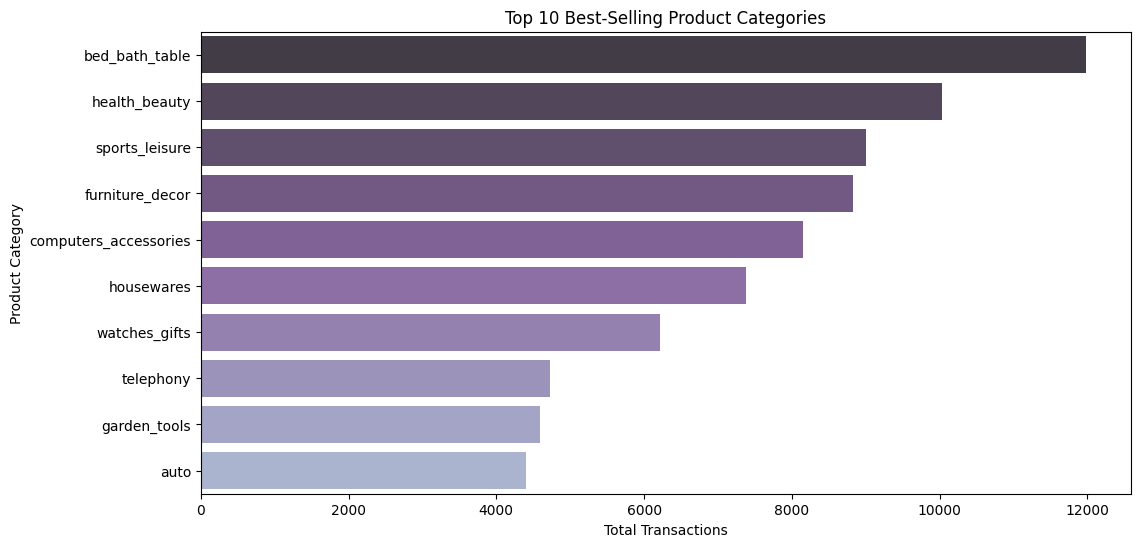

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=best_selling_products_df.sort_values(by='total_transactions', ascending=False).head(10), 
    x='total_transactions', y='product_category_name_english', hue='product_category_name_english', 
    legend=False, palette='BuPu_r_d')

plt.xlabel('Total Transactions')
plt.ylabel('Product Category')
plt.title('Top 10 Best-Selling Product Categories')
plt.show()

**Insight:**
- Berdasarkan grafik batang tersebut, dari total 71 kategori produk hasilnya menunjukkan bahwa kategori produk `bed_bath_table` memiliki jumlah transaksi yang paling tinggi. Hal ini menunjukkan bahwa produk terkait tempat tidur, kamar mandi, dan meja memiliki permintaan yang tinggi di pasar.

### Pertanyaan 2: Bagaimana Pola Pembayaran Pelanggan? (Metode yang Sering digunakan & Rata-rata Jumlah pembayaran)

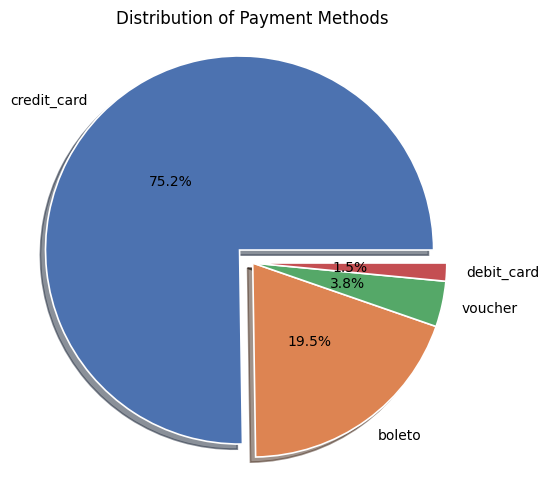

In [77]:
# filtered not_defined payment type
filtered_df = payment_methods_df[payment_methods_df['payment_type'] != 'not_defined']

payment_labels = filtered_df['payment_type']
payment_counts = filtered_df[('total_transactions', 'nunique')]
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(7,6))
plt.pie(
    payment_counts, explode=explode, labels=payment_labels, colors=sns.color_palette('deep'),
    autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1.2}, 
    shadow=True, pctdistance=0.5, radius=1.05
)

plt.title('Distribution of Payment Methods')
plt.show()


**Insight:**
- Berdasarkan diagram lengkaran tersebut, metode pembayaran didominasi oleh `credit_card` sebanyak 75,2%. Dominasi kartu kredit menunjukkan preferensi pelanggan terhadap pembayaran yang lebih fleksibel, sementara penggunaan boleto masih cukup signifikan, kemungkinan karena popularitasnya di Brasil.

### Pertanyaan 3: Seberapa Puas Pelanggan dengan Layanan Olist?

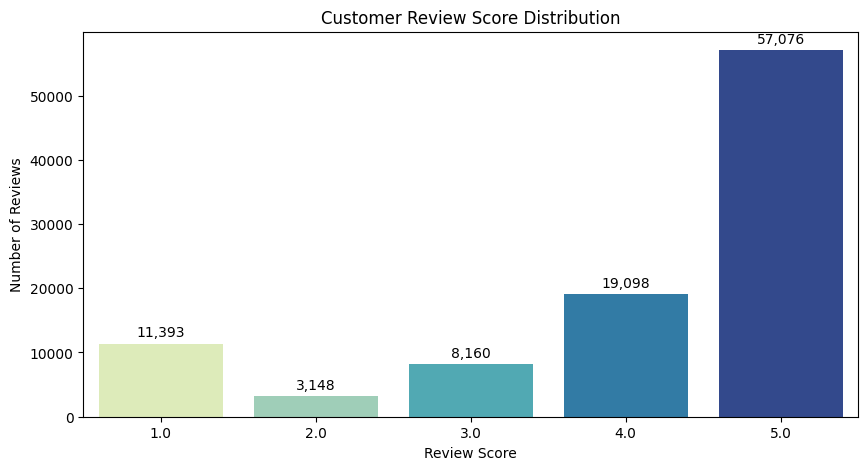

In [78]:
num_colors = customer_satisfaction_df['review_score'].nunique()
colors = sns.color_palette('YlGnBu', n_colors=num_colors)  

plt.figure(figsize=(10,5))
ax = sns.barplot(data=customer_satisfaction_df, x='review_score', y='review_count', hue='review_score', legend=False, palette=colors)

plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Customer Review Score Distribution')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width()/2, p.get_height()), 
                xytext=(0,5), textcoords='offset points', 
                ha='center', fontsize=10)

plt.show()


**Insight:**
- Berdasarkan grafik batang tersebut, jumlah review tertinggi berada pada skor 5, lalu diikuti oleh skor 4, yang menunjukkan bahwa sebagian besar pelanggan puas dengan pengalaman belanja mereka.
- Skor 1 lebih tinggi dibandingkan skor 2 dan 3, yang menandakan bahwa ketika pelanggan tidak puas, mereka cenderung langsung memberikan skor terendah. Ini bisa disebabkan oleh ekspektasi yang tidak terpenuhi, masalah pengiriman, atau kualitas produk yang buruk.

### Pertanyaan 4: Bagaimana Sebaran Pengguna Layanan Olist berdasarkan Letak Geografis?

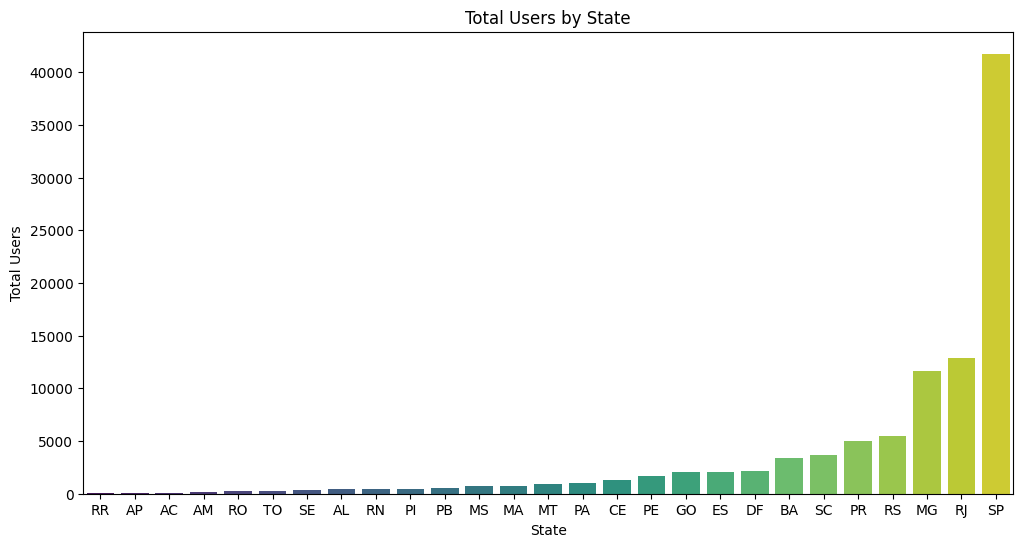

In [79]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=states_users_df.sort_values(by='total_users', ascending=True),
    x='customer_state', y='total_users', hue='customer_state', 
    legend=False, palette='viridis')

plt.title('Total Users by State')
plt.xlabel('State') 
plt.ylabel('Total Users')
plt.show()

**Insight:**
- Berdasarkan grafik batang tersebut, jumlah pengguna tertinggi berada di negara bagian `SP` (São Paulo), menunjukkan bahwa São Paulo adalah pasar utama bagi bisnis ini. Hal ini mungkin disebabkan oleh kepadatan populasi yang tinggi dan infrastruktur e-commerce yang lebih berkembang dibandingkan daerah lain di Brasil.

### Pertanyaan 5: Apakah terdapat relasi antara skor review yang rendah dengan keterlambatan pengiriman pada pesanan?

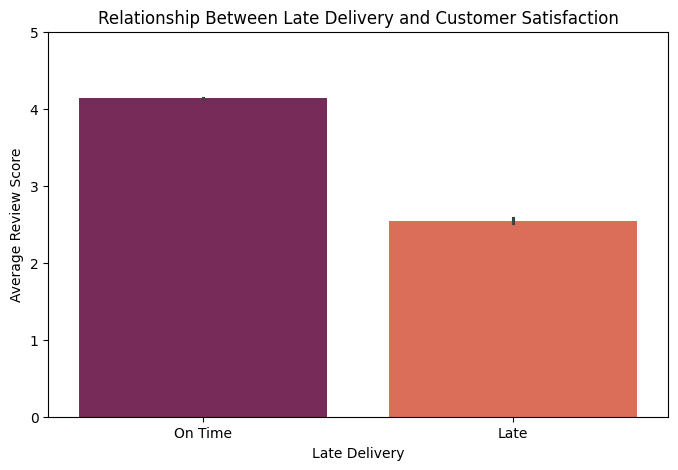

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='is_late', y='review_score', hue='is_late', legend=False, palette='rocket')

plt.xlabel('Late Delivery')
plt.ylabel('Average Review Score')
plt.title('Relationship Between Late Delivery and Customer Satisfaction')
plt.xticks([0,1], ['On Time', 'Late'])
plt.ylim(0, 5)
plt.show()


**Insight:**
- Berdasarkan grafik batang tersebut, pesanan yang dikirim tepat waktu memiliki rata-rata skor review lebih tinggi (>4) dibandingkan pesanan yang terlambat (~2.5). Ini menegaskan bahwa keterlambatan pengiriman berdampak negatif pada kepuasan pelanggan. Untuk meningkatkan kepuasan, perusahaan perlu memperbaiki estimasi pengiriman, meningkatkan efisiensi logistik, dan memberikan transparansi dalam pelacakan pesanan.

### Conclusion

- Konklusi Pertanyaan 1: Kategori Produk yang Paling Laku dan Pola Penjualannya
    - Dari total 71 kategori produk, kategori `bed_bath_table` mencatat transaksi tertinggi, menunjukkan permintaan yang kuat di segmen ini. Dari perspektif bisnis, hal ini mengindikasikan bahwa kategori ini bisa menjadi fokus utama dalam strategi pemasaran, promosi, dan manajemen stok untuk meningkatkan profitabilitas. Pola penjualan menunjukkan bahwa beberapa kategori memiliki tingkat penjualan rendah, yang dapat menjadi peluang untuk analisis lebih lanjut terkait penyebab rendahnya permintaan, apakah karena harga, ulasan pelanggan, atau ketersediaan stok.

- Konklusi Pertanyaan 2: Pola Pembayaran Pelanggan
    - `credit_card` adalah metode pembayaran utama (75,2%), diikuti oleh `boleto` (19,5%), sedangkan metode lain seperti `voucher` dan `debit_card` memiliki persentase lebih kecil. Dari sudut pandang bisnis, dominasi kartu kredit menunjukkan kepercayaan pelanggan terhadap transaksi digital dan peluang bagi Olist untuk menawarkan program loyalitas atau cicilan berbunga rendah. Sementara itu, tingginya penggunaan boleto bisa menunjukkan adanya segmen pelanggan yang masih bergantung pada pembayaran non-kartu, yang dapat dimanfaatkan dengan menawarkan lebih banyak opsi pembayaran atau diskon khusus untuk metode tertentu guna meningkatkan konversi.

- Konklusi Pertanyaan 3: Kepuasan Pelanggan terhadap Layanan Olist
    - Mayoritas pelanggan memberi rating 5 dan 4, yang menunjukkan pengalaman positif, namun jumlah review dengan skor 1 lebih tinggi dibanding skor 2 dan 3, menandakan adanya sejumlah pelanggan yang sangat tidak puas. Dari perspektif bisnis, penting untuk mengevaluasi keluhan dari pelanggan yang memberikan skor rendah guna mengidentifikasi titik lemah dalam layanan, seperti kualitas produk, kebijakan retur, atau dukungan pelanggan. Meningkatkan pengalaman pelanggan dapat berdampak pada loyalitas dan retensi pengguna.

- Konklusi Pertanyaan 4: Sebaran Pengguna Berdasarkan Letak Geografis
    - Negara bagian São Paulo (SP) memiliki jumlah pengguna terbanyak, menjadikannya pasar utama bagi Olist. Hal ini dapat menjadi dasar bagi strategi ekspansi bisnis dengan memperkuat operasi di wilayah ini atau memperluas jangkauan ke negara bagian lain yang memiliki potensi pasar tetapi belum dimaksimalkan. Analisis lebih lanjut dapat membantu memahami faktor yang membuat São Paulo mendominasi, seperti infrastruktur, daya beli, atau tren e-commerce di wilayah tersebut.

- Konklusi Pertanyaan 5: Relasi antara Skor Review Rendah dan Keterlambatan Pengiriman
    - Pesanan yang dikirim tepat waktu mendapatkan skor review yang lebih tinggi dibandingkan pesanan yang terlambat. Hal ini menunjukkan bahwa ketepatan waktu pengiriman sangat berpengaruh terhadap kepuasan pelanggan. Dari sudut pandang operasional, bisnis perlu meningkatkan efisiensi rantai pasok, mengoptimalkan logistik, dan menawarkan fitur pelacakan yang lebih transparan untuk meminimalkan keterlambatan. Peningkatan dalam pengiriman dapat berdampak langsung pada perbaikan skor ulasan dan kepercayaan pelanggan, yang pada akhirnya meningkatkan loyalitas dan retensi pengguna.

## 4. Analisis Lanjutan (Opsional)

### RFM Analysis (Recency, Frequency, Monetary)

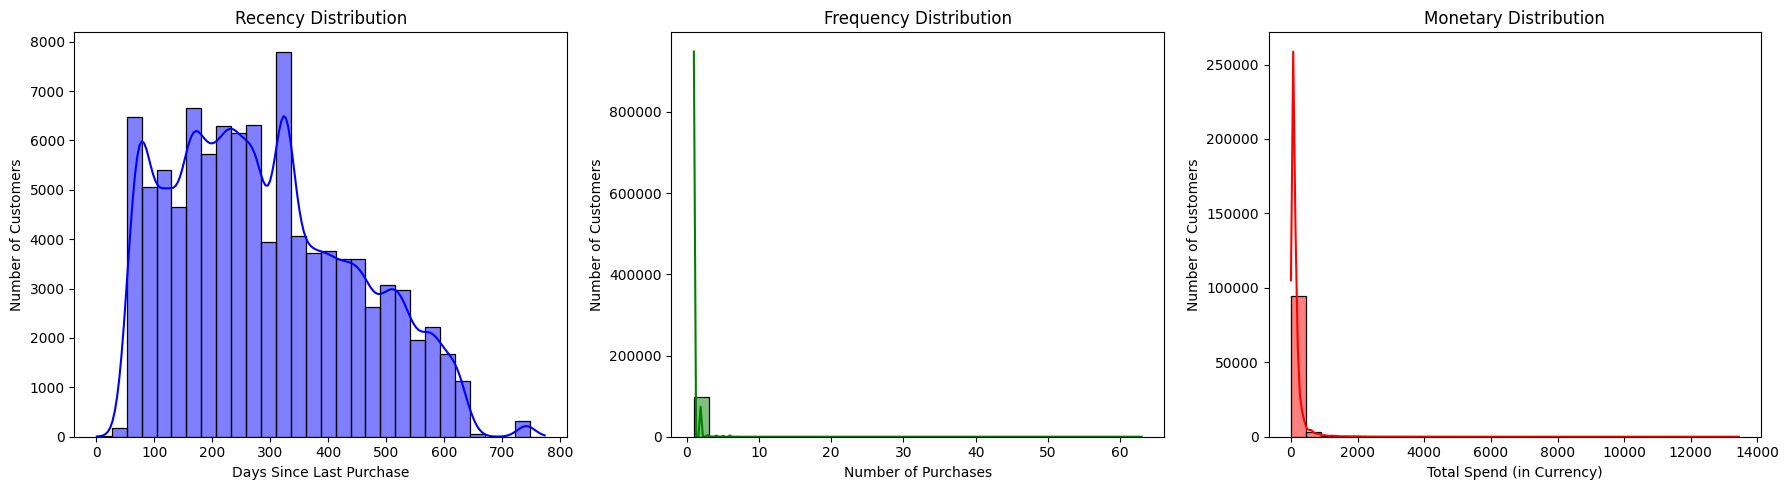

In [81]:
# Calculate reference date and 1 day addition 
reference_date = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Calculate RFM
rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Change column names
rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Setup plot size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Recency
sns.histplot(rfm_df['recency'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Number of Customers')

# Plot Frequency
sns.histplot(rfm_df['frequency'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Number of Customers')

# Plot Monetary
sns.histplot(rfm_df['monetary'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend (in Currency)')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

**Insight:**
- Recency
    - Distribusi recency menunjukkan pola right-skewed, yang berarti sebagian besar pelanggan melakukan transaksi dalam 100-400 hari terakhir. Setelah 400 hari, terjadi penurunan signifikan, menunjukkan semakin sedikit pelanggan yang kembali setelah periode tersebut. 
    - Hanya sedikit pelanggan yang tetap aktif setelah lebih dari satu tahun, mengindikasikan adanya potensi churn (pelanggan yang berhenti menggunakan layanan) yang tinggi.

- Frequency 
    - Distribusi frequency juga right-skewed, di mana sebagian besar pelanggan hanya melakukan 1-2 transaksi sepanjang periode analisis. 
    - Hal ini menunjukkan bahwa mayoritas pelanggan tidak melakukan pembelian berulang, yang bisa menjadi tantangan dalam membangun loyalitas pelanggan. Rendahnya tingkat pembelian ulang dapat menandakan perlunya strategi retensi, seperti program loyalitas atau penawaran khusus bagi pelanggan tetap.

- Monetary
    - Distribusi monetary kembali menunjukkan pola right-skewed, dengan sebagian besar pelanggan memiliki total pengeluaran di bawah 2000 BRL (mata uang lokal Brazil). 
    - Hanya sedikit pelanggan yang memiliki nilai transaksi tinggi, yang mungkin berasal dari pelanggan bernilai tinggi (high-value customers). Pola ini menunjukkan bahwa mayoritas pelanggan melakukan pembelian dalam jumlah kecil, sehingga ada peluang untuk meningkatkan nilai rata-rata transaksi (Average Order Value/AOV) melalui strategi upselling atau bundling produk.

## 5. Menyimpan data yang sudah dibersihkan

In [82]:
# Save cleaned data
cleaned_data_directory = 'cleaned_data/'  
merged_df.to_csv(cleaned_data_directory + 'merged_data.csv', index=False)